[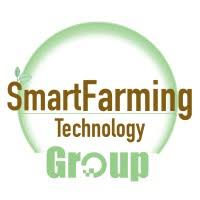](https://www.linkedin.com/company/sftgaua/)
# Crop Images Scarcity-Traditional Data Augmentation-1

### Instructions
1. Clone the repository.
2. Download the necessary datasets from Eden Repository:
   1. Tomato-Solanum lycopersicum-291020-Potassium deficiency-zz
3. Unzip dataset files and remove the zip files.
4. Create a folder called 'tomato_weeds'.
5. Move the unzipped datasets into this folder.
6. The resulting directory structure should be:
    * working_directory/
       * Data Augmentation-Didymella watermelon.ipynb
       * eden_data/
           * Tomato-Solanum lycopersicum-291020-Potassium deficiency-zz
7. Install notebook dependencies by running:
    <pre><code>conda create -n name_of_environment --file eden-package-list.txt</code></pre>
8. Open the notebook: jupyter notebook
9. Run the code

## Background (Go to [Bibliography](#references) for more)

In the agriculture, for the problem of **data scarcity**, several techniques have been used by researchers to create more images based on the available datasets. The one which is shown in this notebook is data augmentation by performing different geometric and colour transformations into the images (Dyrmann et al., 2016; Mehdipour-Ghazi et al., 2017; Fuentes et al., 2017). Within this **data augmentation** set of techniques, images can be rotated by various angles, cropped, scaled, blurred, noised, gray-scaled, or mirrored.

In [1]:
import numpy as np
import cv2
from tqdm import tqdm
from glob import glob
import random

import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt

%matplotlib inline

## Auxiliar Functions

In [2]:
def read_data(path, im_size=(128,128)):
    X = []
    for im_file in tqdm(glob(path)):
        if im_file.lower().endswith("jpg"):
            try:
                label = im_file.split("/")[1]
                im = cv2.imread(im_file)
                im = cv2.resize(im, im_size)
                im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
                X.append(im)
            except Exception as e:
                print(e)
    
    X = np.array(X, np.uint8)
    return X

In [7]:
def plot_sample(images):
    nb_rows = 2
    nb_cols = 2
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(6, 6))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images[random.randint(0, images.shape[0]-1)])

In [8]:
def plot_augmented_sample(images):
    nb_rows = 10
    nb_cols = 10
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(16, 16))

    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            axs[i, j].xaxis.set_ticklabels([])
            axs[i, j].yaxis.set_ticklabels([])
            axs[i, j].imshow(images[random.randint(0, images.shape[0]-1)])

In [9]:
X = read_data('eden_data/*/*')
y = np.array([0] * X.shape[0])
print("Current Number of Images:", np.array(X).shape[0])

100%|██████████| 14/14 [00:00<00:00, 57.78it/s]

Current Number of Images: 12


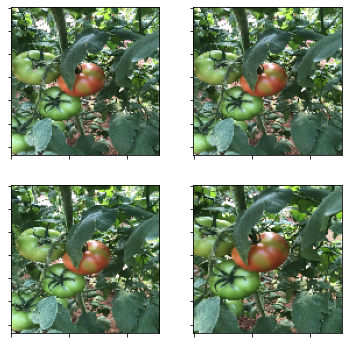

In [10]:
plot_sample(X)

## Data augmentation with Keras

In [16]:
idg = ImageDataGenerator(
    rotation_range=360,
    zoom_range = 0.5, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.8,1.21],
    fill_mode='nearest', 
    cval=255
)

In [17]:
%%time
augmented_images = []
i = 0
for batch in idg.flow(X, y, batch_size=1):
    augmented_images.append(batch[0][0])
    i += 1
    if i > 99:
        break 

CPU times: user 283 ms, sys: 42 µs, total: 283 ms
Wall time: 282 ms


In [18]:
print("Current Number of Images:", np.array(augmented_images).shape[0])

Current Number of Images: 100


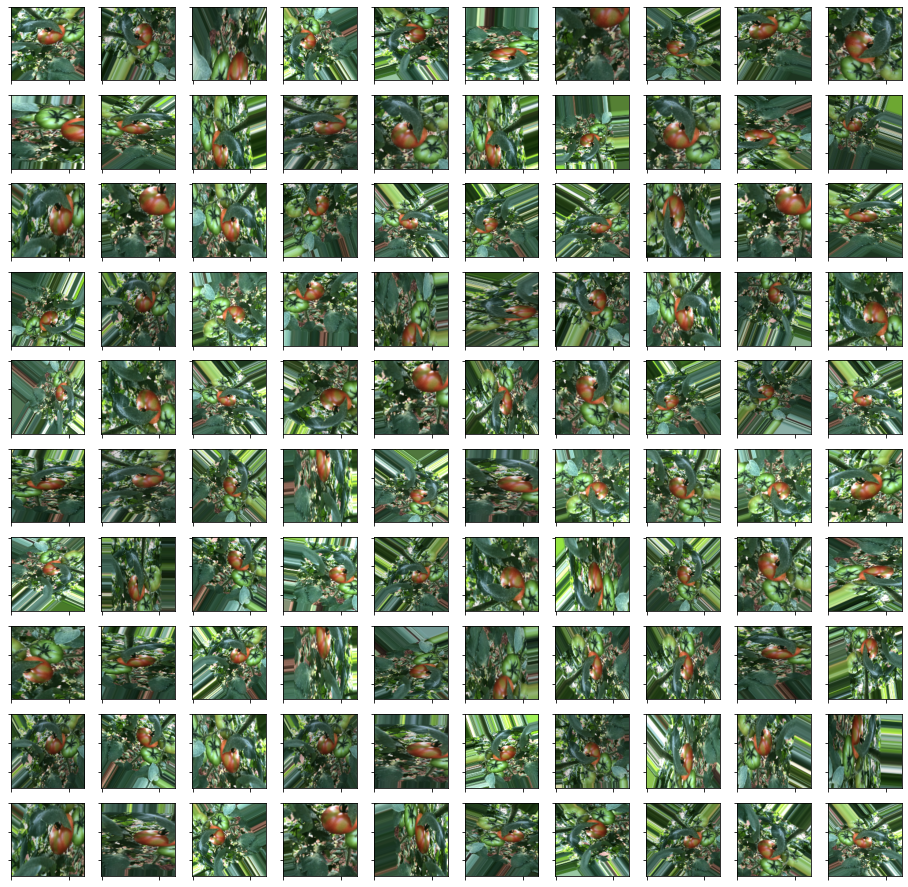

In [19]:
plot_augmented_sample(np.array(augmented_images).astype(np.uint8))

## References
<a id='references'></a>
Dyrmann, M., Karstoft, H., & Midtiby, H.S. (2016). Plant species classification using deep convolutional neural networks. Biosystems Engineering, 151, 72-80.

Mehdipour-Ghazi, M., Yanikoglu, B.A., & Aptoula, E. (2017). Plant identification using deep neural networks via optimization of transfer learning parameters. Neurocomputing, 235, 228-235.

Fuentes, A., Yoon, S., Kim, S., & Park, D. (2017). A Robust Deep-Learning-Based Detector for Real-Time Tomato Plant Diseases and Pests Recognition. Sensors (Basel, Switzerland), 17.

https://keras.io/api/preprocessing/image/